In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

In [2]:
class JointNormal1(GenericLikelihoodModel):
    
    def loglikeobs(self, params):
        data = np.concatenate([[self.endog],self.exog.transpose()],axis=0)
        mult_rv = stats.multivariate_normal([params[0], 0.0], [[1,0],[0,1]])
        return mult_rv.logpdf(data.transpose())
    
    
class JointNormal2(GenericLikelihoodModel):
    
    def loglikeobs(self, params):
        data = np.concatenate([[self.endog],self.exog.transpose()],axis=0)
        mult_rv = stats.multivariate_normal([0.0, params[0]], [[1,0],[0,1]])
        return mult_rv.logpdf(data.transpose())


def setup_shi(yn,xn):
    # model 1 grad, etc.
    nobs = yn.shape[0]
    model1_param = np.array([yn.mean()])
    model2_param = np.array([xn.mean()])
    
    model1_deriv = JointNormal1(yn,xn)
    ll1 = model1_deriv.loglikeobs(model1_param)
    grad1 =  model1_deriv.score_obs(model1_param).reshape( (nobs,1) )
    hess1 = model1_deriv.hessian(model1_param)
    
    
    model2_deriv = JointNormal2(yn,xn)
    ll2 = model2_deriv.loglikeobs(model2_param)
    grad2 =  model2_deriv.score_obs(model2_param).reshape( (nobs,1) )  
    hess2 = model2_deriv.hessian(model2_param)
    
    return ll1,grad1,hess1,model1_param,ll2,grad2,hess2,model2_param

def gen_data(beta= 1.5, nobs=1000):
    cov = [[25, 0], [0, 1]]
    data = np.random.multivariate_normal([beta,beta], [[25,0],[0,1]],  nobs)
    return data[:,0],data[:,1],nobs

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_shi(yn,xn)
print(grad1.shape,hess1.shape)

(1000, 1) (1, 1)


../figs/ex2beta0


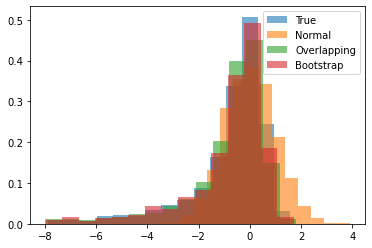

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.791 & 2.360 & -7.005 & 23.315 & -6.983 & 39.786 \\
Bootstrap & -0.830 & 2.655 & -8.444 & 28.897 & -8.417 & 49.752 \\
Normal & 0.010 & 0.994 & -0.033 & 0.072 & -0.033 & 3.035 \\
Overlapping & -0.817 & 2.500 & -8.004 & 29.222 & -7.999 & 47.919 \\
\bottomrule
\end{tabular}
\end{center}


In [3]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=0)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta0')

../figs/ex2beta5


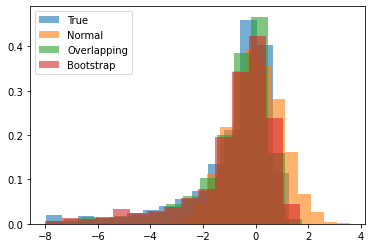

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.888 & 2.928 & -9.829 & 34.609 & -9.799 & 59.979 \\
Bootstrap & -0.829 & 2.767 & -8.399 & 27.216 & -8.373 & 49.888 \\
Normal & -0.009 & 0.974 & -0.003 & -0.062 & -0.003 & 2.782 \\
Overlapping & -0.807 & 2.375 & -7.195 & 24.675 & -7.190 & 41.548 \\
\bottomrule
\end{tabular}
\end{center}


In [4]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=0)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta5')

../figs/ex2beta10


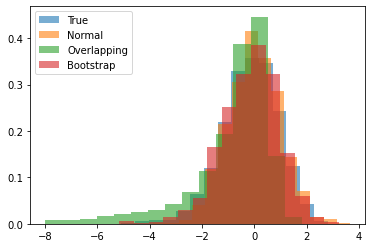

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.167 & 1.203 & -0.631 & 0.908 & -0.629 & 5.227 \\
Bootstrap & -0.154 & 1.190 & -0.749 & 1.625 & -0.747 & 5.846 \\
Normal & 0.001 & 0.986 & 0.017 & 0.100 & 0.017 & 3.017 \\
Overlapping & -0.845 & 2.518 & -7.498 & 24.499 & -7.493 & 43.468 \\
\bottomrule
\end{tabular}
\end{center}


In [5]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=1.)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta10')

../figs/ex2beta15


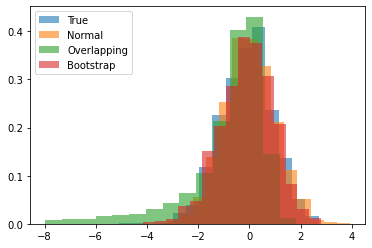

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.102 & 1.052 & -0.310 & 0.507 & -0.309 & 3.810 \\
Bootstrap & -0.113 & 1.079 & -0.345 & 0.341 & -0.344 & 3.817 \\
Normal & 0.006 & 0.994 & 0.000 & 0.055 & 0.000 & 3.015 \\
Overlapping & -0.821 & 2.445 & -7.424 & 25.402 & -7.420 & 43.289 \\
\bottomrule
\end{tabular}
\end{center}


In [6]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=1.5)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta15')

../figs/ex2beta20


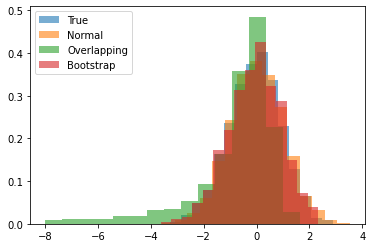

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.071 & 0.978 & -0.136 & -0.085 & -0.135 & 2.772 \\
Bootstrap & -0.073 & 0.995 & -0.236 & -0.021 & -0.235 & 2.936 \\
Normal & 0.006 & 1.024 & -0.002 & -0.061 & -0.002 & 3.082 \\
Overlapping & -0.783 & 2.460 & -7.809 & 27.846 & -7.804 & 45.944 \\
\bottomrule
\end{tabular}
\end{center}


In [7]:
gen_data_ex = lambda : gen_data(nobs=1000,beta=2)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/ex2beta20')